# Santa Monica Airport Weather Data Analysis
# By Ethan Deal

I am originally from Long Beach, California, and the recent fires near my hometown have inspired me to explore potential trends in wind, precipitation, and temperature that might contribute to the conditions that created these fires. For this analysis, I used data from the Santa Monica Airport weather station, which is close to the Pacific Palisades, one of the areas most affected by the fires. This station was chosen for its proximity and high-quality data, which includes daily wind speed, precipitation, minimum temperature, and maximum temperature measurements. The dataset spans two decades, from January 13, 2005, to January 13, 2025, and consists of 7,248 data points after cleaning. Overall, the aim of this data analysis to determine if there are weather conditions conducive to forest fires.

## Import Libraries and Data

In [24]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [25]:
# Load the CSV file from GitHub
file_path = "https://raw.githubusercontent.com/ed3894/GEOL-558A/main/unsupervised/Weather_Data_Santa_Monica.csv"
data = pd.read_csv(file_path)

# Print the column names
print("Column Names:")
print(data.columns)

# Print the first few rows
print("\nFirst Few Values:")
print(data.head())

Column Names:
Index(['STATION', 'NAME', 'DATE', 'AWND', 'PRCP', 'TMAX', 'TMIN'], dtype='object')

First Few Values:
       STATION                                   NAME       DATE  AWND  PRCP  \
0  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/13/2005  4.03   0.0   
1  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/14/2005  3.58   0.0   
2  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/15/2005  3.58   0.0   
3  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/16/2005  4.47   0.0   
4  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/17/2005  6.04   0.0   

   TMAX  TMIN  
0  64.0  42.0  
1  70.0  46.0  
2  71.0  46.0  
3  81.0  51.0  
4  81.0  55.0  


## Clean Data

In [26]:
# Drop rows where any of the specified columns have NaN values
columns_to_check = ['AWND', 'PRCP', 'TMAX', 'TMIN']
data_cleaned = data.dropna(subset=columns_to_check)

# Print the shape of the cleaned dataframe and a preview
print("Shape after removing rows with NaN values in AWND, PRCP, TMAX, or TMIN:")
print(data_cleaned.shape)

print("\nPreview of the cleaned dataframe:")
print(data_cleaned.head())

Shape after removing rows with NaN values in AWND, PRCP, TMAX, or TMIN:
(7248, 7)

Preview of the cleaned dataframe:
       STATION                                   NAME       DATE  AWND  PRCP  \
0  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/13/2005  4.03   0.0   
1  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/14/2005  3.58   0.0   
2  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/15/2005  3.58   0.0   
3  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/16/2005  4.47   0.0   
4  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/17/2005  6.04   0.0   

   TMAX  TMIN  
0  64.0  42.0  
1  70.0  46.0  
2  71.0  46.0  
3  81.0  51.0  
4  81.0  55.0  


In [27]:
# Quantify data lost to cleaning
print('Original Data Length:',data.shape[0])
print('Cleaned Data Length:',data_cleaned.shape[0])
print('Difference:',data.shape[0] - data_cleaned.shape[0])

Original Data Length: 7299
Cleaned Data Length: 7248
Difference: 51


**My data cleaning is relatively straight forward. I only want to analyze rows that have all 4 of the weather metrics I will analyze (AWND, PRCP, TMAX, and TMIN). To do this, I remove any rows that have a Nan value in any of those columns. This process only removed 51 rows from the original 7299 row dataset. This speaks to why I chose this data, it had most of the weather metrics I was after, and it had really complete data over a two decade time span. In the later analysis I looked for signficant outliers that may have been bad values (such as temperatures of 200 degrees), but I did not see any. Again, speaking to the quality of this data.**

## Exploratory Data Analysis (EDA)

### Data Shape and Statistics

In [28]:
# Check the shape of the dataset
print("Dataset Shape:")
print(data_cleaned.shape)

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(data_cleaned.describe())

Dataset Shape:
(7248, 7)

Descriptive Statistics:
              AWND         PRCP         TMAX         TMIN
count  7248.000000  7248.000000  7248.000000  7248.000000
mean      4.506231     0.033088    70.846164    55.834851
std       1.317005     0.190217     7.483144     6.956778
min       0.000000     0.000000    50.000000    32.000000
25%       3.800000     0.000000    65.000000    51.000000
50%       4.470000     0.000000    70.000000    56.000000
75%       5.140000     0.000000    75.000000    61.000000
max      14.760000     3.460000   103.000000    75.000000


**While there are 7,248 rows, with 4 columns of data to be analyzed, these are single numeric values in each cell. This gives really fast runtimes for visualiziaitons/calculations and would definitely not be considered 'big data'**

### Seaborn Plots


Generating Seaborn Pair Plot...


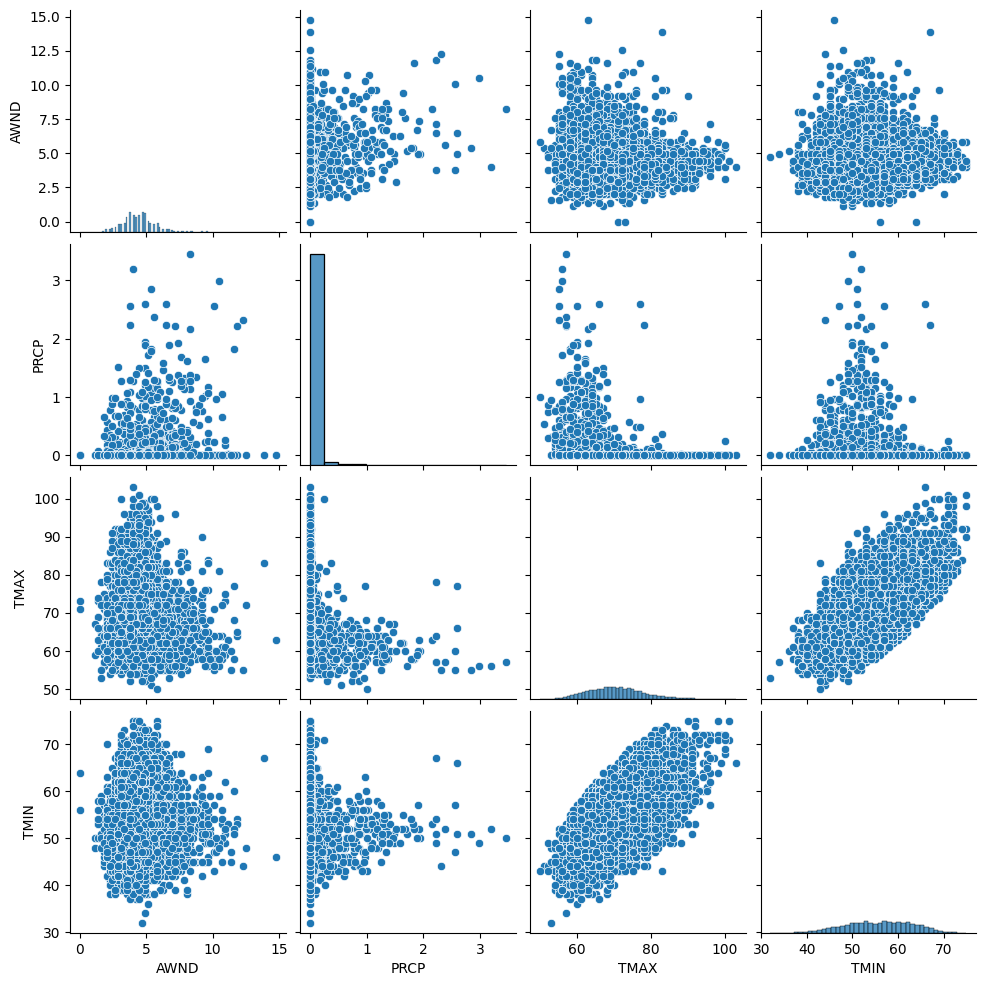

In [29]:
# Pair plot to visualize pairwise relationships
print("\nGenerating Seaborn Pair Plot...")
sns.pairplot(data_cleaned)
plt.show()

**Clearly there will be a distinct trend between temperature minimum and maximum. However, these seaborn plots do show interesting clusters of data. Wind speed and temperature seem to form distinct clusters without many outliers. In comparison, many of the other plots seem to have values scattered out. Precipitation seems to have a lot of values around 0, which explains why many of those points are around that value.**

### Correlation Heat Map

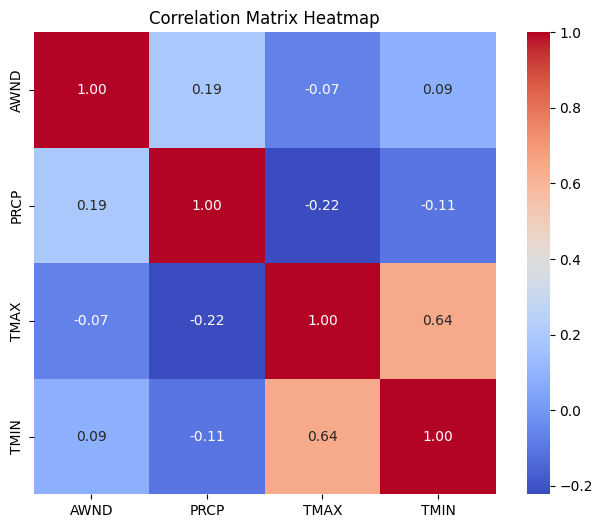

In [30]:
# Select only numeric columns
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

**The correlation matrix heatmap corroborates many of my previous points from the seaborn plots. The strongest correlation is between temperature min and max. The second strongest correlation is between temperature max and precipitation, which is negative. However, most of these trends are quite weak.**

### Histograms

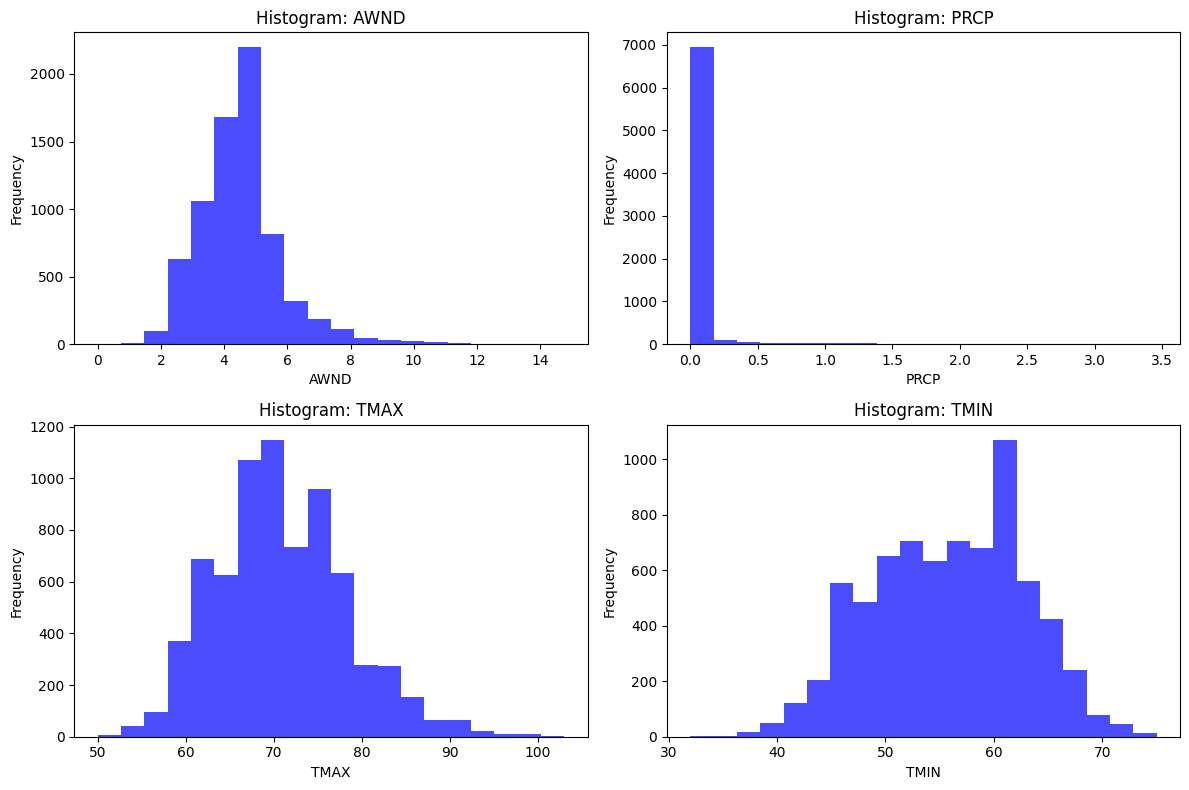

In [31]:
# List of columns to plot
columns = ['AWND', 'PRCP', 'TMAX', 'TMIN']

# Create histograms for each column
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(data_cleaned[column], bins=20, color='blue', alpha=0.7)
    plt.title(f"Histogram: {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**The histograms for wind, temp min, and temp max have more normal distributions. With precipitation, we see that the vast majority of values are 0, or near 0 which is indicative of the decades long drought in California, and is a clear connection to increased fire risk.**

### Box Plots

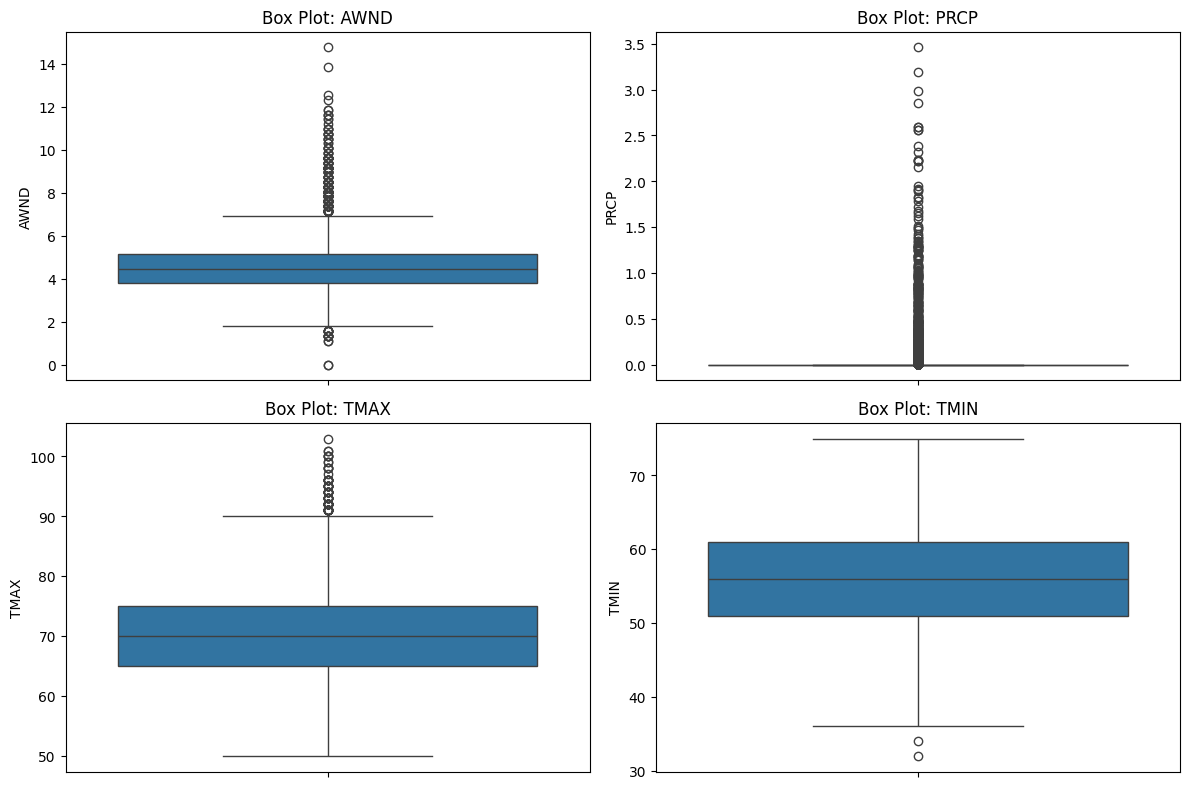

In [32]:
# Create box plots for each column
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data_cleaned[column])
    plt.title(f"Box Plot: {column}")
    plt.ylabel(column)

plt.tight_layout()
plt.show()

**The box plots show a lot of similar trends to those mentioned before where wind and temperature data follow more normal distributions, while the precipitation data is condensed to 0.**

## Unsupervised Methods

In [33]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
#!pip install umap-learn
import umap.umap_ as umap

**If  umap does not import, uncomment and run the !pip install line.**

### PCA

Explained Variance Ratio (by component):
PC1: 43.06%
PC2: 29.24%
PC3: 19.36%
PC4: 8.35%

Cumulative Variance Explained:
PC1: 43.06%
PC2: 72.29%
PC3: 91.65%
PC4: 100.00%


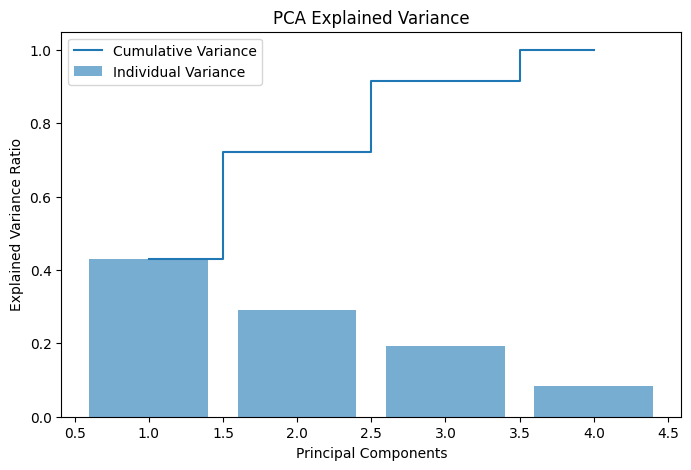

In [34]:
# Extract the data for the specified columns and drop NaN values
data_pca = data_cleaned[columns].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_pca)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance Ratio (by component):")
for i, variance in enumerate(explained_variance):
    print(f"PC{i+1}: {variance:.2%}")

print("\nCumulative Variance Explained:")
for i, variance in enumerate(cumulative_variance):
    print(f"PC{i+1}: {variance:.2%}")

# Plot the explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, align='center', label='Individual Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend(loc='best')
plt.show()

**This analysis tells us that PC1 explains 43.06% of the variance in the data, while PC2 explains 29.24%, and PC3 explains 19.36%. Together, these three components account for over 90% of the variance in the data. This means that the majority of the information in the original dataset can be effectively represented in just three dimensions, significantly reducing the complexity of the data. By focusing on these principal components, we can identify the most meaningful patterns and relationships in the data while minimizing noise or redundant information. This reduction not only simplifies analysis but also makes techniques like clustering or visualization more computationally efficient and interpretable, without losing critical insights.**

In [35]:
# PCA loadings (coefficients for original features in each principal component)
loadings = pd.DataFrame(pca.components_.T, index=columns, columns=[f'PC{i+1}' for i in range(len(columns))])
print("\nPCA Loadings (coefficients for original features):")
print(loadings)


PCA Loadings (coefficients for original features):
           PC1       PC2       PC3       PC4
AWND -0.069101  0.761466 -0.630291  0.134639
PRCP -0.323832  0.573204  0.747279  0.090250
TMAX  0.684805  0.068409  0.158790  0.707918
TMIN  0.649153  0.294835  0.138179 -0.687444


**The PCA loadings tell us the contribution of each feature (AWND, PRCP, TMAX, and TMIN) to each of the principal components. The values themselves indicate the strength of this relationship, where positive values represent a positive relationship, and negative values represent negative relationships. The higher the magnitude of the value, the stronger that relationship. For PC1, we can see that temperature has by far the largest influence, both of which are positive. For PC2, we see that this influence remains positive, but is now attributed to AWND and PRCP. These to features remain the most influential for PC3 as well, however, AWND has a negative relationship, while PRCP is positive.**

### KMeans

**For K-Means, I am choosing to just analyze TMAX in lieu of TMIN. As shown in the EDA for this project, TMAX and TMIN have a very strong linear relationship. This means that they represent similar trends, just scaled differently. I went with TMAX because it has a greater contribution to PC1 and PC3, therefore explaining more variance in the data. The PCA analysis also shows that most of this data can be explained with 3 dimensions instead of 4. This choice simplifies the clustering process while retaining the most meaningful information in the data, improving the interpretability of the results.**


Evaluating Silhouette Score for features: AWND, PRCP


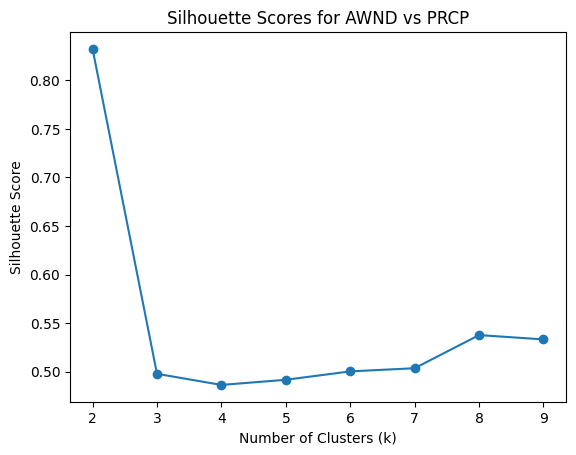

Optimal number of clusters for AWND and PRCP: 2

Evaluating Silhouette Score for features: AWND, TMAX


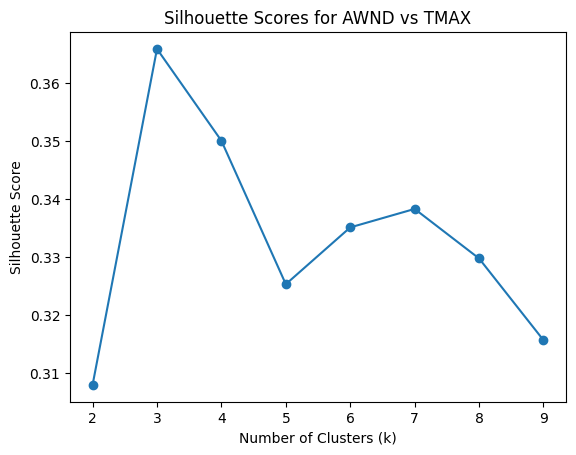

Optimal number of clusters for AWND and TMAX: 3

Evaluating Silhouette Score for features: PRCP, TMAX


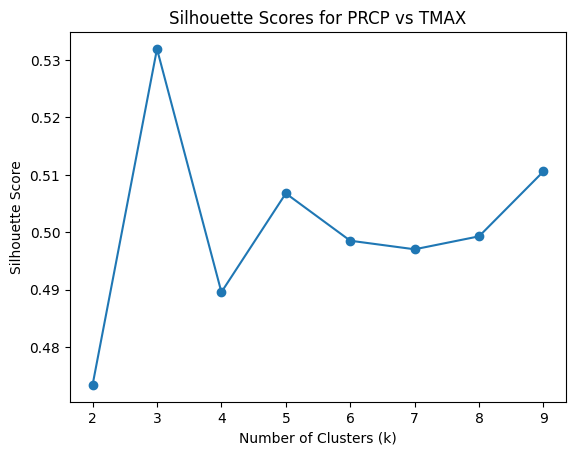

Optimal number of clusters for PRCP and TMAX: 3


In [36]:
# Feature pairs for clustering
columns_to_cluster = [('AWND', 'PRCP'), ('AWND', 'TMAX'), ('PRCP', 'TMAX')]

for pair in columns_to_cluster:
    feature_x, feature_y = pair
    print(f"\nEvaluating Silhouette Score for features: {feature_x}, {feature_y}")

    # Extract the two features
    data_2d = data_cleaned[[feature_x, feature_y]].dropna()  # Drop rows with NaN

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_2d)

    # Calculate silhouette scores for different values of k
    silhouette_scores = []
    K = range(2, 10)  # Start from 2 clusters (silhouette score is undefined for k=1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(scaled_data)
        score = silhouette_score(scaled_data, cluster_labels)
        silhouette_scores.append(score)

    # Plot silhouette scores
    plt.figure()
    plt.plot(K, silhouette_scores, marker='o')
    plt.title(f'Silhouette Scores for {feature_x} vs {feature_y}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.show()

    # Determine the optimal number of clusters
    optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
    print(f"Optimal number of clusters for {feature_x} and {feature_y}: {optimal_k}")


**I chose to use the silhouette score to choose the optimal number of clusters for my three pairs of data. I was happy with these visualization results as it shows a distinct best choice for each of the three pairs. AWND and PRCP is 2, AWND and TMAX is 3, and PRCP and TMAX is 3. These are the number of clusters I will now use for K-means.**


Clustering for features: AWND and PRCP with 2 clusters


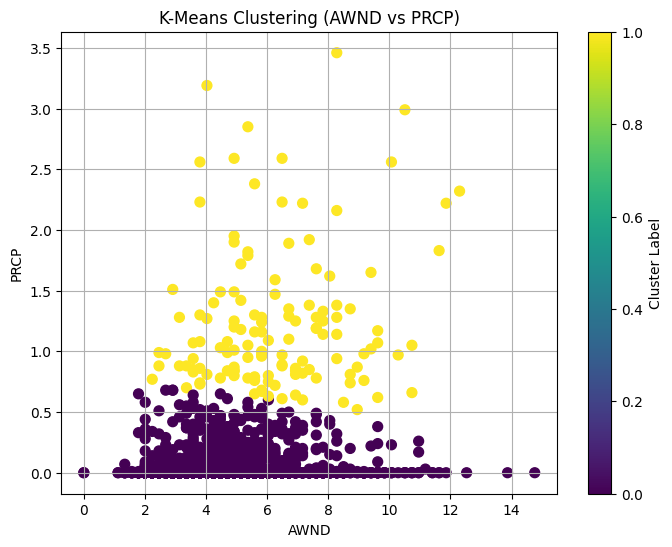


Clustering for features: AWND and TMAX with 3 clusters


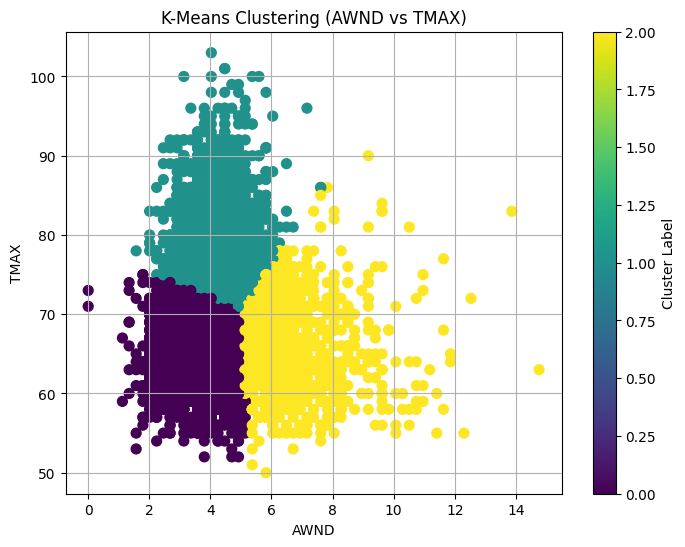


Clustering for features: PRCP and TMAX with 3 clusters


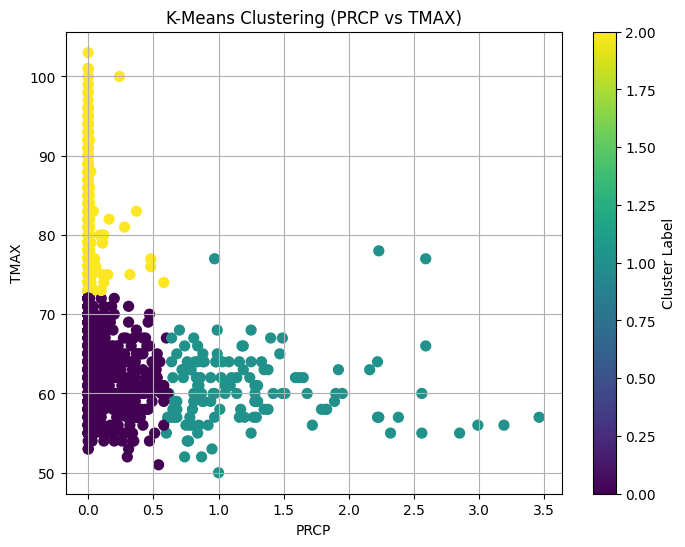

In [37]:
# Feature pairs and their specified number of clusters
feature_clusters = {
    ('AWND', 'PRCP'): 2,
    ('AWND', 'TMAX'): 3,
    ('PRCP', 'TMAX'): 3
}

# Loop through each feature pair and perform K-Means clustering
for pair, n_clusters in feature_clusters.items():
    feature_x, feature_y = pair
    print(f"\nClustering for features: {feature_x} and {feature_y} with {n_clusters} clusters")

    # Extract and standardize the data
    data_2d = data_cleaned[[feature_x, feature_y]].dropna()
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_2d)

    # Apply K-Means with the specified number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)

    # Add cluster labels to the DataFrame for visualization
    data_2d['Cluster'] = cluster_labels

    # Plot the clusters without centroids
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        data_2d[feature_x], data_2d[feature_y],
        c=cluster_labels, cmap='viridis', s=50
    )
    plt.title(f'K-Means Clustering ({feature_x} vs {feature_y})')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.colorbar(scatter, label='Cluster Label')
    plt.grid()
    plt.show()


**I was generally happy with these clustering results, especially since there really aren't distinct clusters inherent to this data. AWND vs PRCP shows a low precipiation and high precipitation that doesn't seem to resuly to heavily on windspeed. AWND vs TMAX shows three clusters, low wind and low temperatures, moderate wind and high temperatures, and moderate temperatures with high wind. Lastly, PRCP vs. TMAX shows a high temperature low precipitation, low temperature low precipitation, and low temperature and higher precipitation cluster. This last result makes the most sense as we really only expect rain at lower temperatures. However, it also shows that even if temperature is favorable for rain, it likely won't due to the longstanding drought, hence the three clusters.**

### UMAP

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


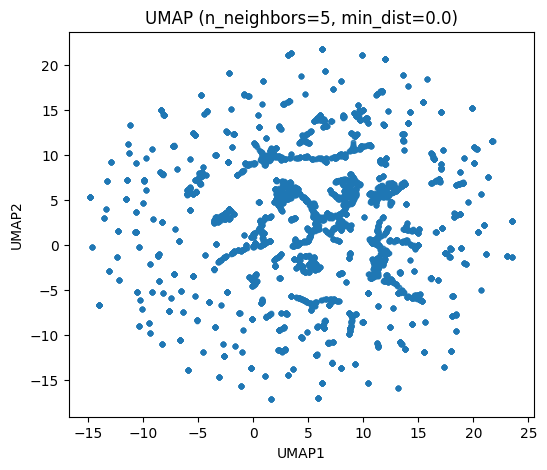

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


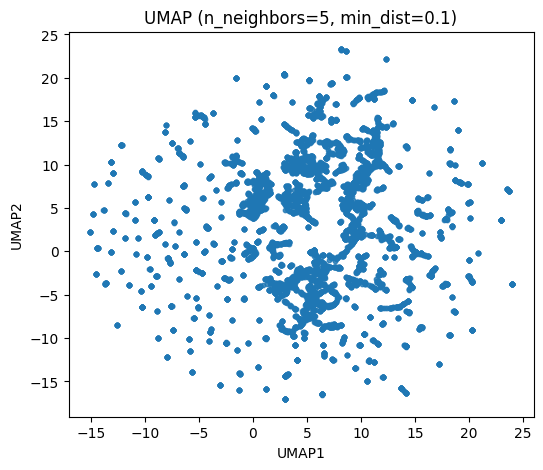

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


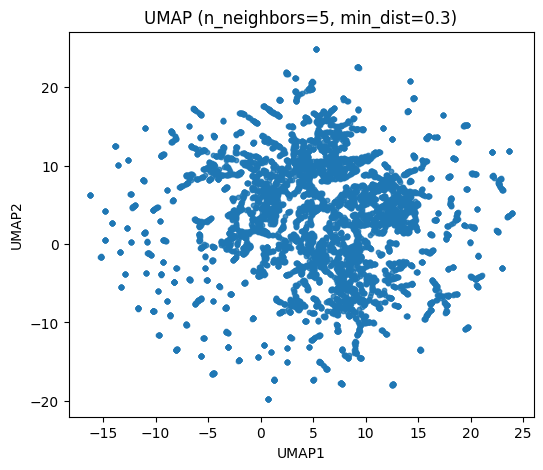

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


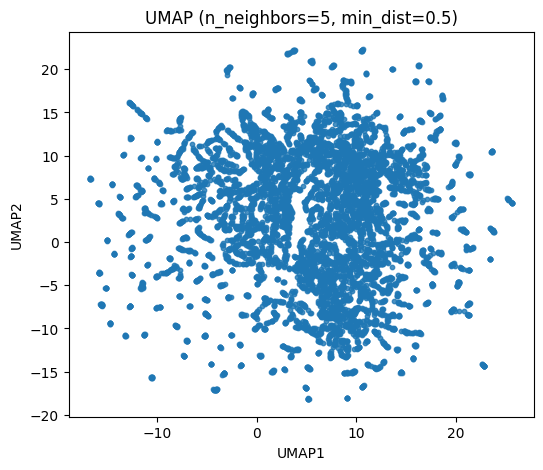

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


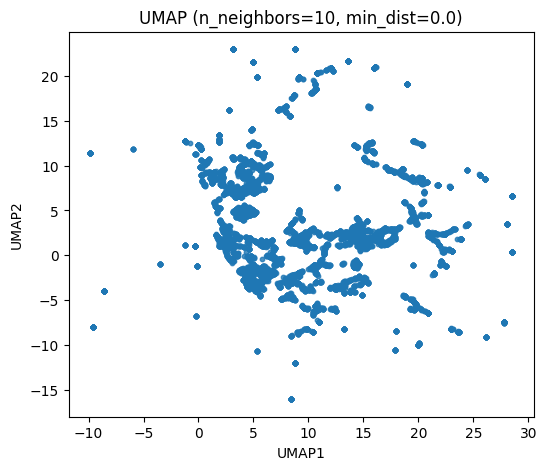

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


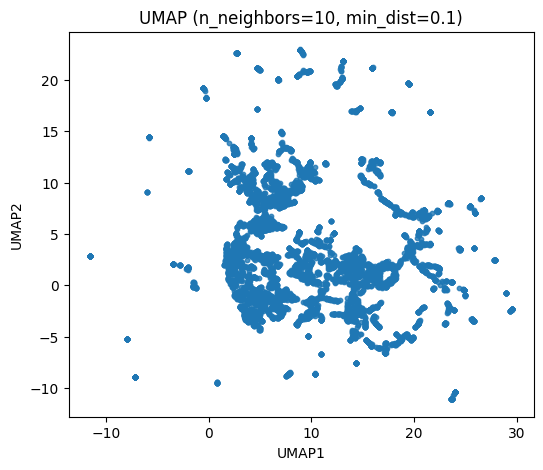

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


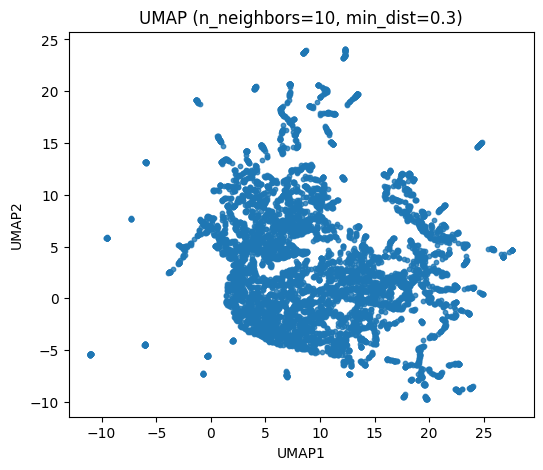

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


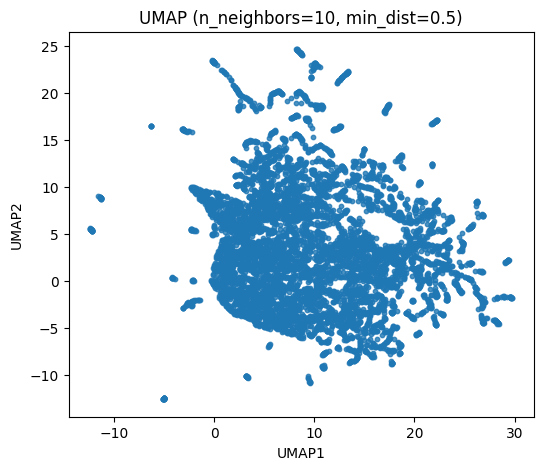

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


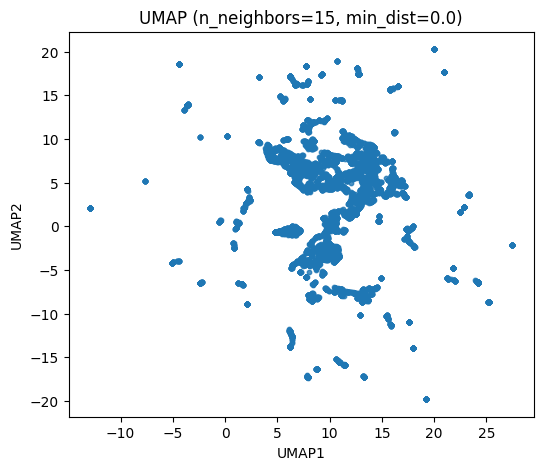

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


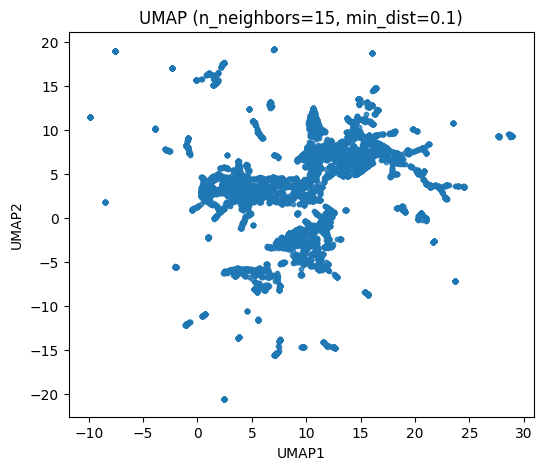

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


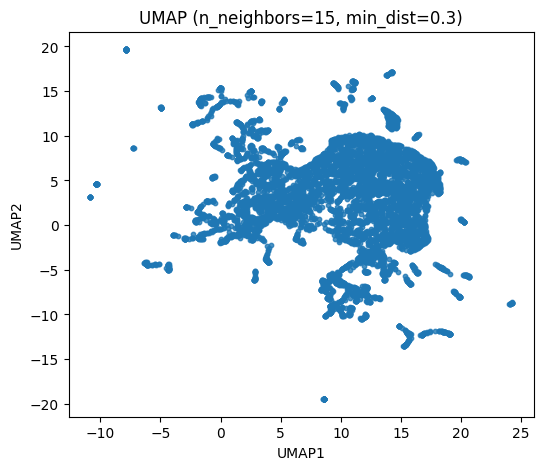

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


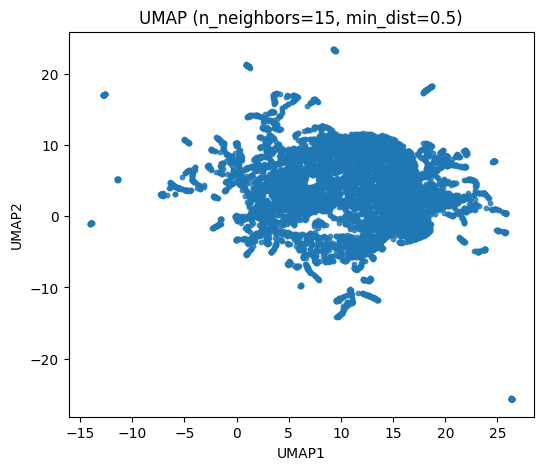

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


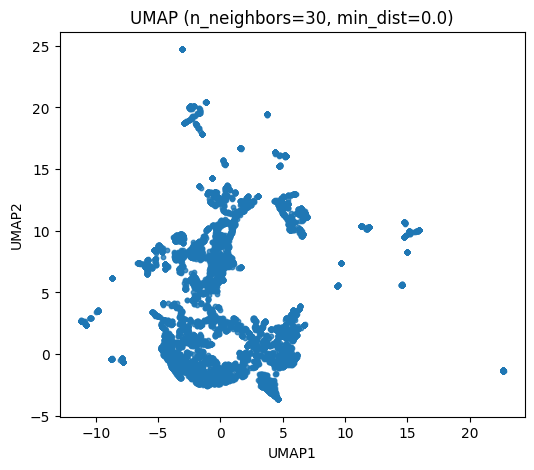

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


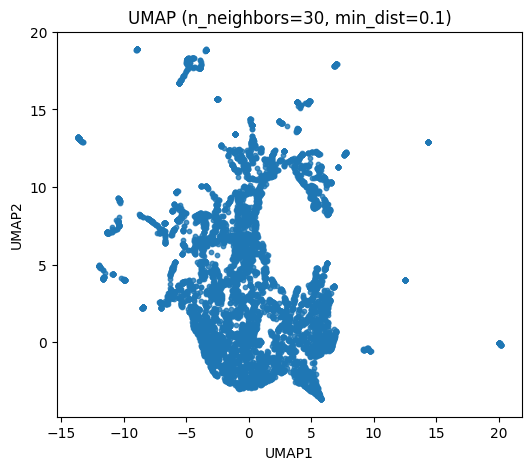

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


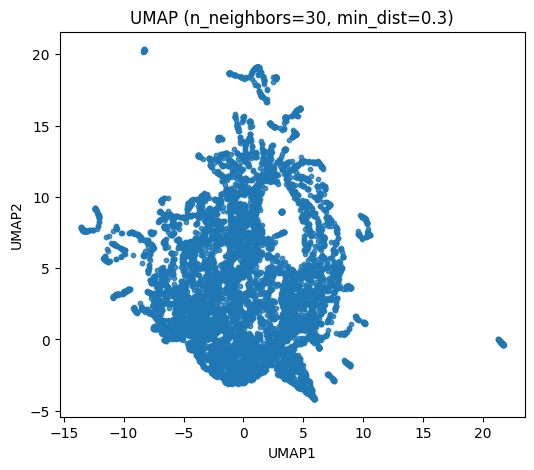

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


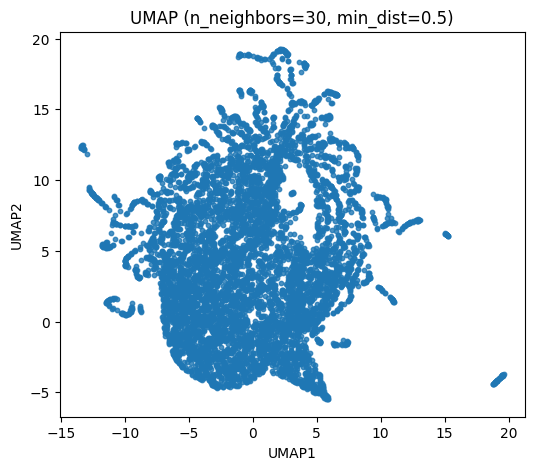

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


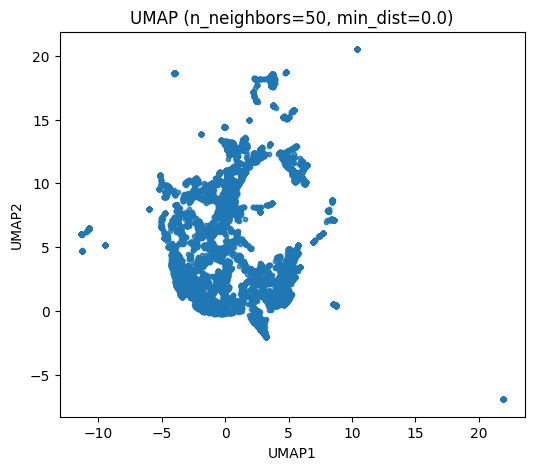

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


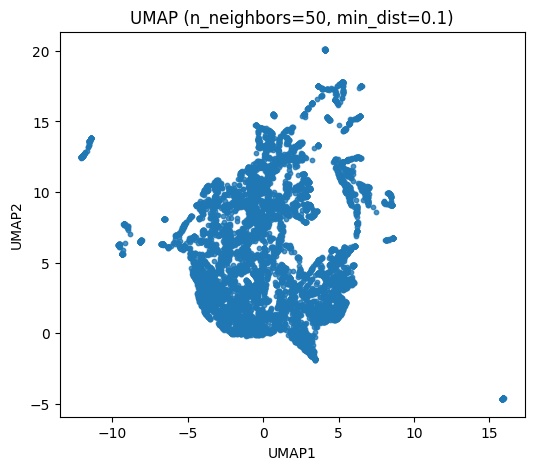

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


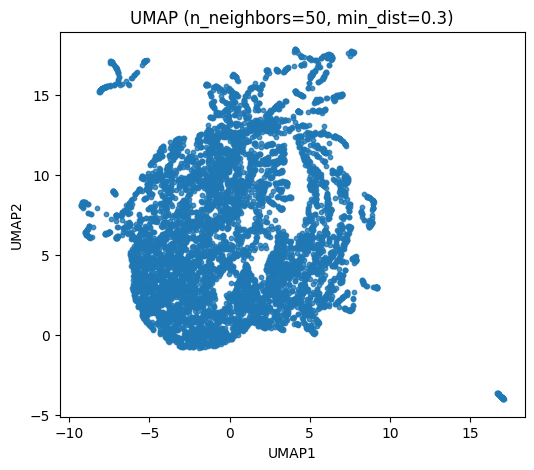

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


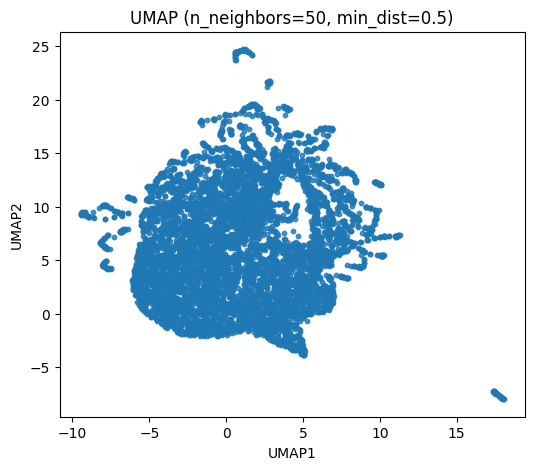

In [38]:
# Extract and standardize the data
data_umap = data_cleaned[columns].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_umap)

# Test different n_neighbors and min_dist values
n_neighbors_values = [5, 10, 15, 30, 50]
min_dist_values = [0.0, 0.1, 0.3, 0.5]

for n_neighbors in n_neighbors_values:
    for min_dist in min_dist_values:
        reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
        embedding = reducer.fit_transform(scaled_data)

        # Plot the embeddings
        plt.figure(figsize=(6, 5))
        plt.scatter(embedding[:, 0], embedding[:, 1], s=10, alpha=0.8)
        plt.title(f'UMAP (n_neighbors={n_neighbors}, min_dist={min_dist})')
        plt.xlabel('UMAP1')
        plt.ylabel('UMAP2')
        plt.show()

**I am newer to UMAP, but as I understand, you want to choose the parameters that create distinct clusters, thus revealing relationships in higher dimensional space. To me, n_neighbors=15 and min_dist=0.1 did this best. It shows 4 clusters, while they aren't the most distinct and there are outliers, there is still some separation.**

## Assignment Questions

 - Which method did you like the most?

**I liked K-means the most because it is the most intuitive. You use something like silhouette score to pick the optimal number of clusters, then you run K-means on your data. The number of clusters is a very intuitive metric that has meaning. It is also easiest to make direct interpretations that apply to your data. In my case, I can pick out clusters and how they relate to fire conditions, such as low temperatures oftentimes not corresponding to precipitation.**

 - Which method did you like the least?

**I did not like UMAP. I thought it produced the most obscure results that were difficult to tie back to meaningful insights about the underlying data features. I also thought the results produced weren't great, as it is meant to form more distinct clusters.**

 - How did you score these unsupervised models?  

**For PCA I used variance loadings to score the significance of each principal component, and the influence of my features on those principal components. For K-means I used silhouette score to pick the optimal number of clusters. For UMAP, I ran the algorithm with varying parameter values for n_neighbors and min_dist.**

 - Did the output align with your geologic understanding?

**My key takeaway from this analysis is that weather conditions which should be conducive to rain are not. It is also clear that precipitation in this area is mostly 0, and even if it does rain, the values are still rarely over 1 inch. Compounded over two decades, this will likely create dry conditions, and prevent first responders from having access to freshwater to fight those fires.**

 - What did you want to learn more about?

**I will probably do some more research into UMAP. There is clearly some room for further optimization, and I think there is potential to uncover some interesting trends in my data.**

 - Did you pre-process your data?

**Yes, I removed any rows with Nan values in my feature columns. This only led to a loss of 51 data points, which is great for a dataset of this size.**

 - What was a decision you were most unsure about?


 **I was unsure about the ranges of values I should use for UMAP. I also did not know if I should have selected a different set of parameter values as the 'best' performer. I also got some UMAP errors relating to adding noise, and I was unsure how to remediate.**